## Huffman Encoding

In [1]:
from IPython.display import Image, display

In [2]:
!pip install -r ../requirements.txt

  Cloning https://github.com/vicente-gonzalez-ruiz/information_theory (to revision main) to /tmp/pip-install-b9ek4ih_/information-theory_a57d2cfeedba404e86ec8789712eb683
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/information_theory /tmp/pip-install-b9ek4ih_/information-theory_a57d2cfeedba404e86ec8789712eb683
  Resolved https://github.com/vicente-gonzalez-ruiz/information_theory to commit d8772a598155c4ad6a3947dff5f2079c4fdc8728
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/vicente-gonzalez-ruiz/DCT2D (to revision master) to /tmp/pip-install-b9ek4ih_/dct2d_8ae2699830254f8bb27ea1fa37c27586
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/DCT2D /tmp/pip-install-b9ek4ih_/dct2d_8ae2699830254f8bb27ea1fa37c27586
  Resolved https://github.com/vicente-gonzalez-ruiz/DCT2D to commit

### Help about basic functionality

In [3]:
!python ../src/Huffman.py -h

usage: Huffman.py [-h] [-g] {encode,decode} ...

Entropy Encoding of images non-adaptive Huffman Coding

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Encode an image
    decode         Decode an image

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


### Help to encode

In [4]:
!python ../src/z_lib.py encode -h

usage: z_lib.py encode [-h] [-i INPUT] [-o OUTPUT]

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input image (default:
                        http://www.hpca.ual.es/~vruiz/images/lena.png)
  -o OUTPUT, --output OUTPUT
                        Output image (default: /tmp/encoded)


### Encode default (remote) image

In [5]:
!python ../src/z_lib.py encode

main Namespace(debug=False, subparser_name='encode', input='http://www.hpca.ual.es/~vruiz/images/lena.png', output='/tmp/encoded', func=<function encode at 0x7fc41a1a6840>)
(INFO) main: input = http://www.hpca.ual.es/~vruiz/images/lena.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 512673 bytes from http://www.hpca.ual.es/~vruiz/images/lena.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 479828 bytes in /tmp/original.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Written 734027 bytes in /tmp/encoded.npz
(INFO) entropy_image_coding: Total 512673 bytes read
(INFO) entropy_image_coding: Total 734027 bytes written
(INFO) entropy_image_coding: rate = 22.400726318359375 bits/pixel


### Help to decode

In [6]:
!python ../src/z_lib.py decode -h

usage: z_lib.py decode [-h] [-i INPUT] [-o OUTPUT]

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input image (default: /tmp/encoded)
  -o OUTPUT, --output OUTPUT
                        Output image (default: /tmp/decoded.png)


### Decode default image

In [7]:
!python ../src/z_lib.py decode

main Namespace(debug=False, subparser_name='decode', input='/tmp/encoded', output='/tmp/decoded.png', func=<function decode at 0x7f3ffcbcdee0>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 734027 bytes from /tmp/encoded.npz
(INFO) entropy_image_coding: Written 479828 bytes in /tmp/decoded.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Total 734027 bytes read
(INFO) entropy_image_coding: Total 479828 bytes written
(INFO) entropy_image_coding: Read 479828 bytes from file:///tmp/original.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Read 479828 bytes from /tmp/decoded.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: RMSE = 0.0
(INFO) entropy_image_coding: J = R + D = 22.400726318359375


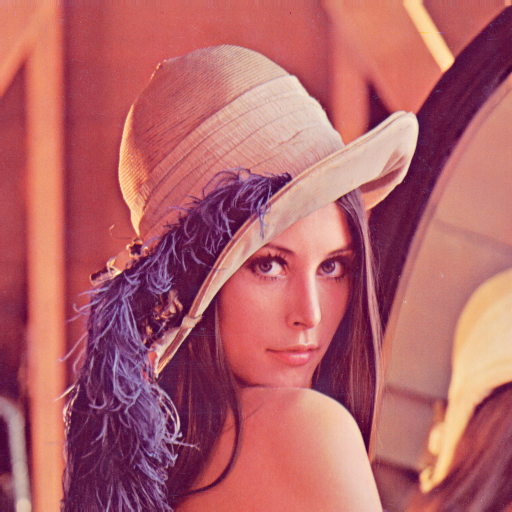

In [8]:
display(Image(filename="/tmp/decoded.png"))

### Encoding and decoding a local images

In [9]:
!wget http://www.hpca.ual.es/~vruiz/images/Homer.png -O /tmp/Homer.png

--2025-03-06 18:16:00--  http://www.hpca.ual.es/~vruiz/images/Homer.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374512 (366K) [image/png]
Saving to: ‘/tmp/Homer.png’

/tmp/Homer.png      100%[===================>] 365.73K   783KB/s    in 0.5s    

2025-03-06 18:16:01 (783 KB/s) - ‘/tmp/Homer.png’ saved [374512/374512]



In [10]:
!python ../src/z_lib.py encode -i /tmp/Homer.png -o /tmp/Homer.huf

main Namespace(debug=False, subparser_name='encode', input='/tmp/Homer.png', output='/tmp/Homer.huf', func=<function encode at 0x7f321b9a6840>)
(INFO) main: input = /tmp/Homer.png
(INFO) main: output = /tmp/Homer.huf
(INFO) entropy_image_coding: Read 374512 bytes from /tmp/Homer.png with shape (768, 637, 3) and type=uint8
(INFO) entropy_image_coding: Written 377399 bytes in /tmp/original.png with shape (768, 637, 3) and type uint8
(INFO) entropy_image_coding: Written 582862 bytes in /tmp/Homer.huf.npz
(INFO) entropy_image_coding: Total 374512 bytes read
(INFO) entropy_image_coding: Total 582862 bytes written
(INFO) entropy_image_coding: rate = 9.531364468864469 bits/pixel


In [11]:
!python ../src/z_lib.py decode -o /tmp/Homer_dec.png -i /tmp/Homer.huf

main Namespace(debug=False, subparser_name='decode', input='/tmp/Homer.huf', output='/tmp/Homer_dec.png', func=<function decode at 0x7fed795cdee0>)
(INFO) main: input = /tmp/Homer.huf
(INFO) main: output = /tmp/Homer_dec.png
(INFO) entropy_image_coding: Read 582862 bytes from /tmp/Homer.huf.npz
(INFO) entropy_image_coding: Written 377399 bytes in /tmp/Homer_dec.png with shape (768, 637, 3) and type uint8
(INFO) entropy_image_coding: Total 582862 bytes read
(INFO) entropy_image_coding: Total 377399 bytes written
(INFO) entropy_image_coding: Read 377399 bytes from file:///tmp/original.png with shape (768, 637, 3) and type=uint8
(INFO) entropy_image_coding: Read 377399 bytes from /tmp/Homer_dec.png with shape (768, 637, 3) and type=uint8
(INFO) entropy_image_coding: RMSE = 0.0
(INFO) entropy_image_coding: J = R + D = 9.531364468864469


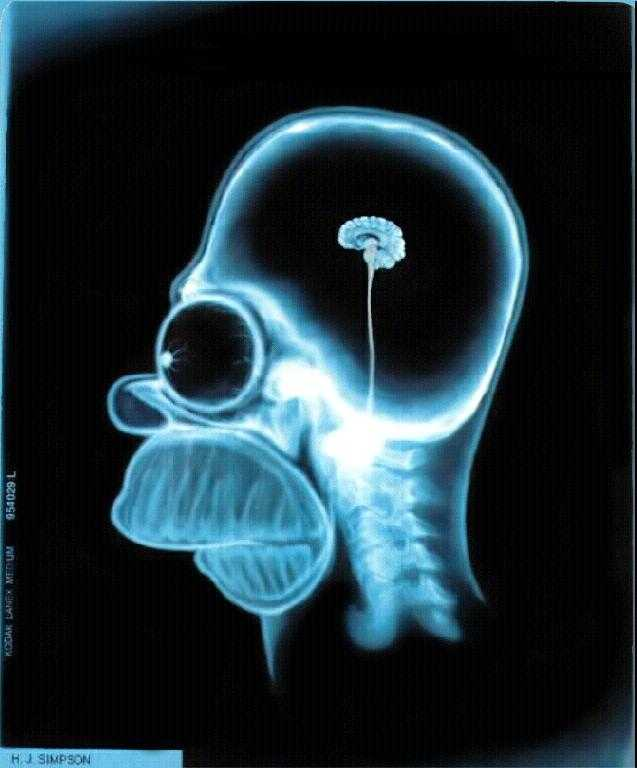

In [12]:
display(Image(filename="/tmp/Homer.png"))